<p align="left">
  <a href="https://colab.research.google.com/github/fernandoarcevega/AI_Workshop/blob/main/Day_3/05_CNN_autoencoder/05_CNN_autoencoder.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" width="200">
  </a>
</p>

In [ ]:
################################################
# Author 1: Wilfrido Gómez-Flores (CINVESTAV)  #
# Author 2: Fernando Arce-Vega (CIO)           #
# e-mail 1: wilfrido.gomez@cinvestav.mx        #
# e-mail 2: farce@cio.mx                       #
# Date:     nov/03/2025                        #
# Subject:  Autoencoder - CNN                  #
################################################

In [ ]:
# Change: Runtime to GPU

In [ ]:
# Libraries
import numpy as np                                                    # Numerical array operations
import matplotlib.pyplot as plt                                       # Data plotting/visualization
import tensorflow as tf                                               # Machine learning

In [ ]:
# Download MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Check feature and targets shapes for training and testing
print(f'Training features shape: {x_train.shape}')
print(f'Testing features shape:  {x_test.shape}')

Training features shape: (60000, 28, 28)
Testing features shape:  (10000, 28, 28)


Training images



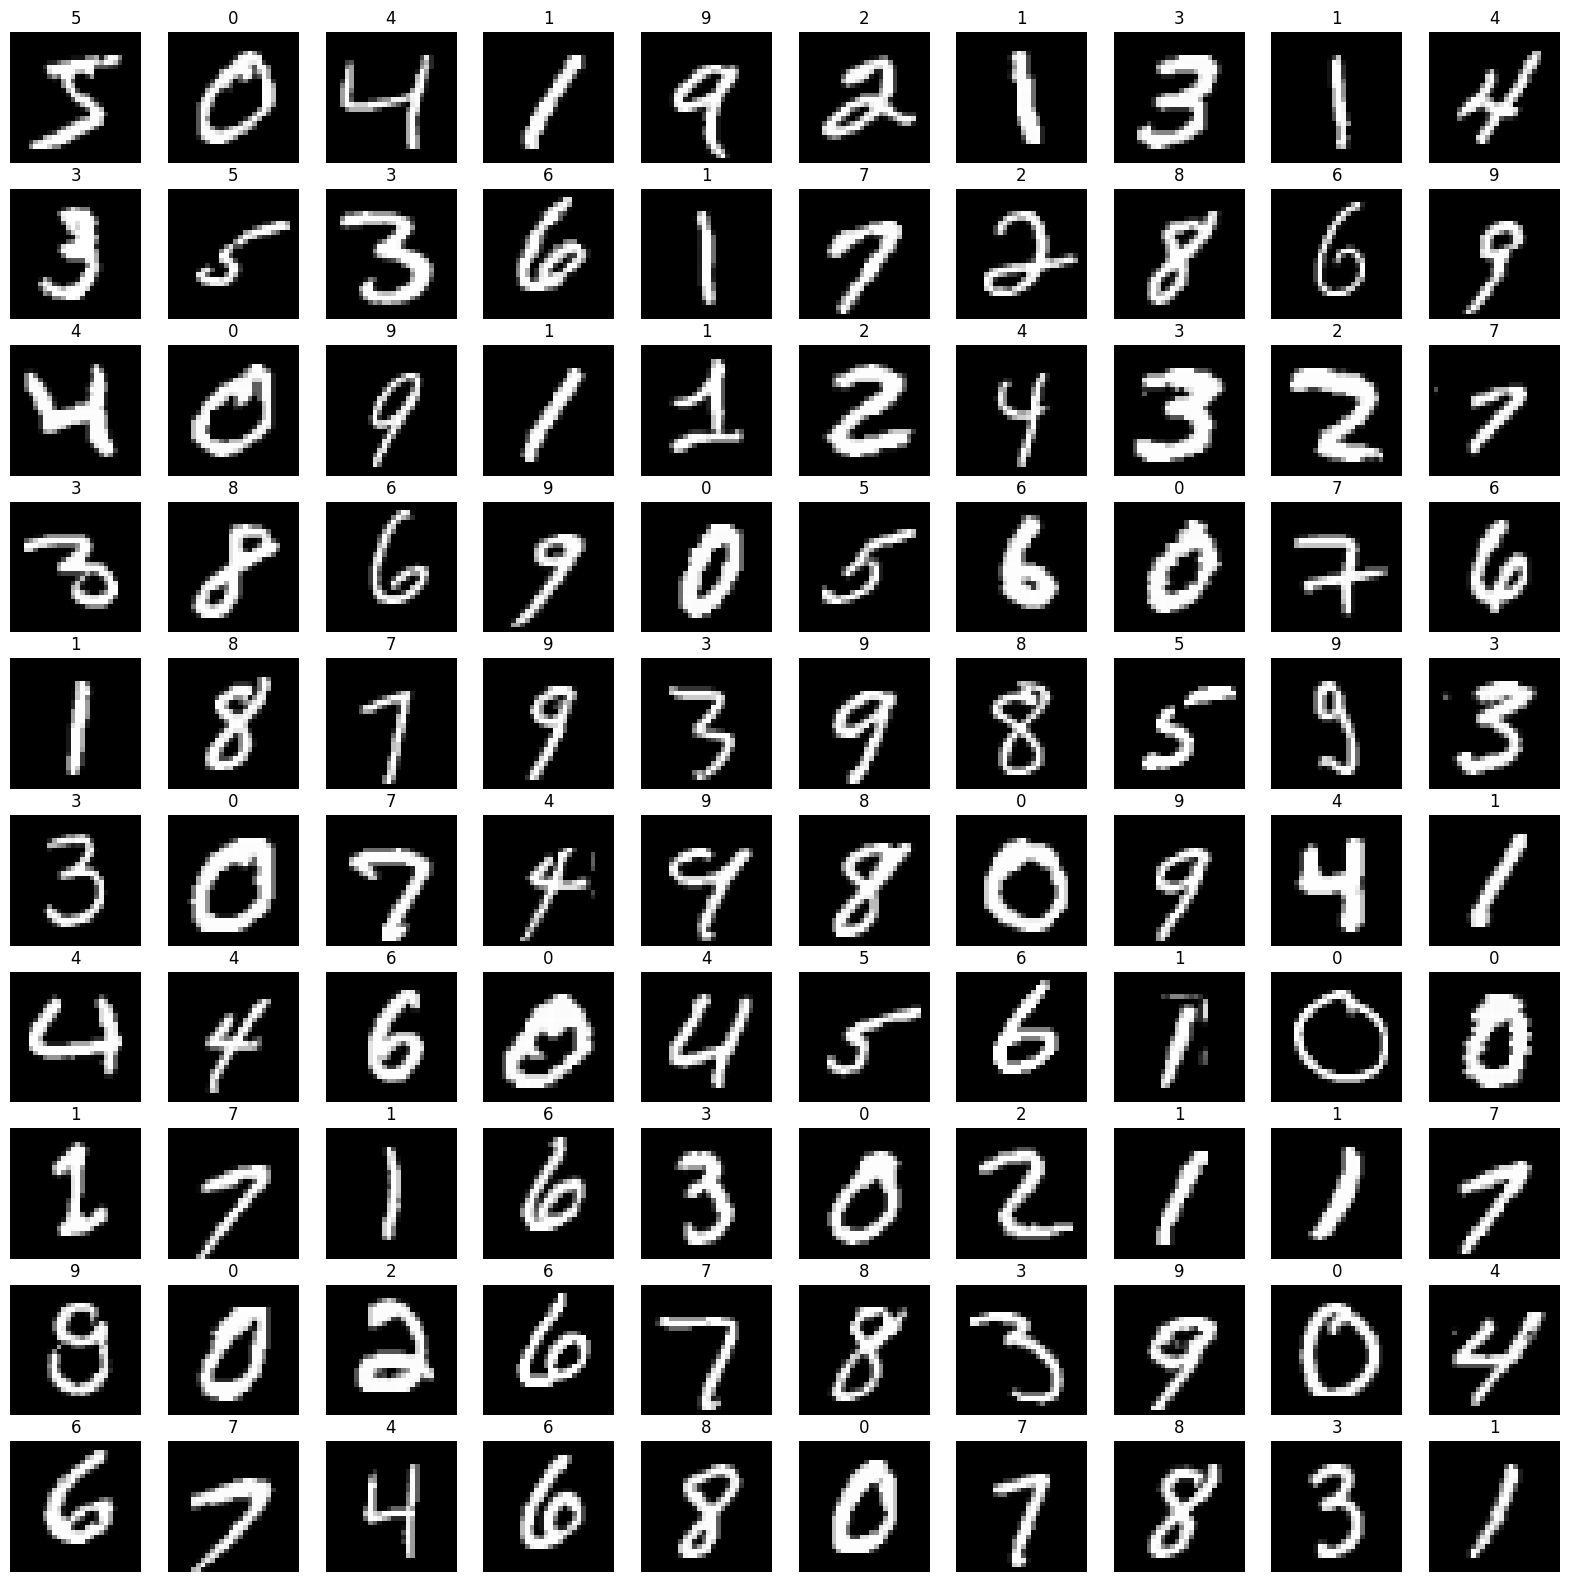

In [ ]:
# Data visualization
ncols = 10
nrows = 10

# Create figure
fig, axs = plt.subplots(figsize=(20, 20))
plt.axis('off')

print('Training images\n')

for i in range(ncols * nrows):

  axs = fig.add_subplot(nrows, ncols, i + 1)
  axs.imshow(x_train[i], cmap='gray')
  axs.axis('off')

  label = str(y_train[i])
  plt.title(label)

plt.show()

In [ ]:
# Data preprocessing
x_train = x_train.reshape(-1, 28, 28, 1).astype(np.float32)
x_test = x_test.reshape(-1, 28, 28, 1).astype(np.float32)

# Data normalization
x_train /= 255.0
x_test /= 255.0

# Check feature and targets shapes for training and testing
print(f'Training features shape:   {x_train.shape}')
print(f'Testing features shape:    {x_test.shape}')

Training features shape:   (60000, 28, 28, 1)
Testing features shape:    (10000, 28, 28, 1)


In [ ]:
# Noise injection
factor = 0.5
x_train_noisy = x_train + factor * np.random.randn(*x_train.shape)
x_test_noisy = x_test + factor * np.random.randn(*x_test.shape)

x_train_noisy = np.clip(x_train_noisy,  0., 1.)
x_test_noisy = np.clip(x_test_noisy,  0., 1.)

Training images



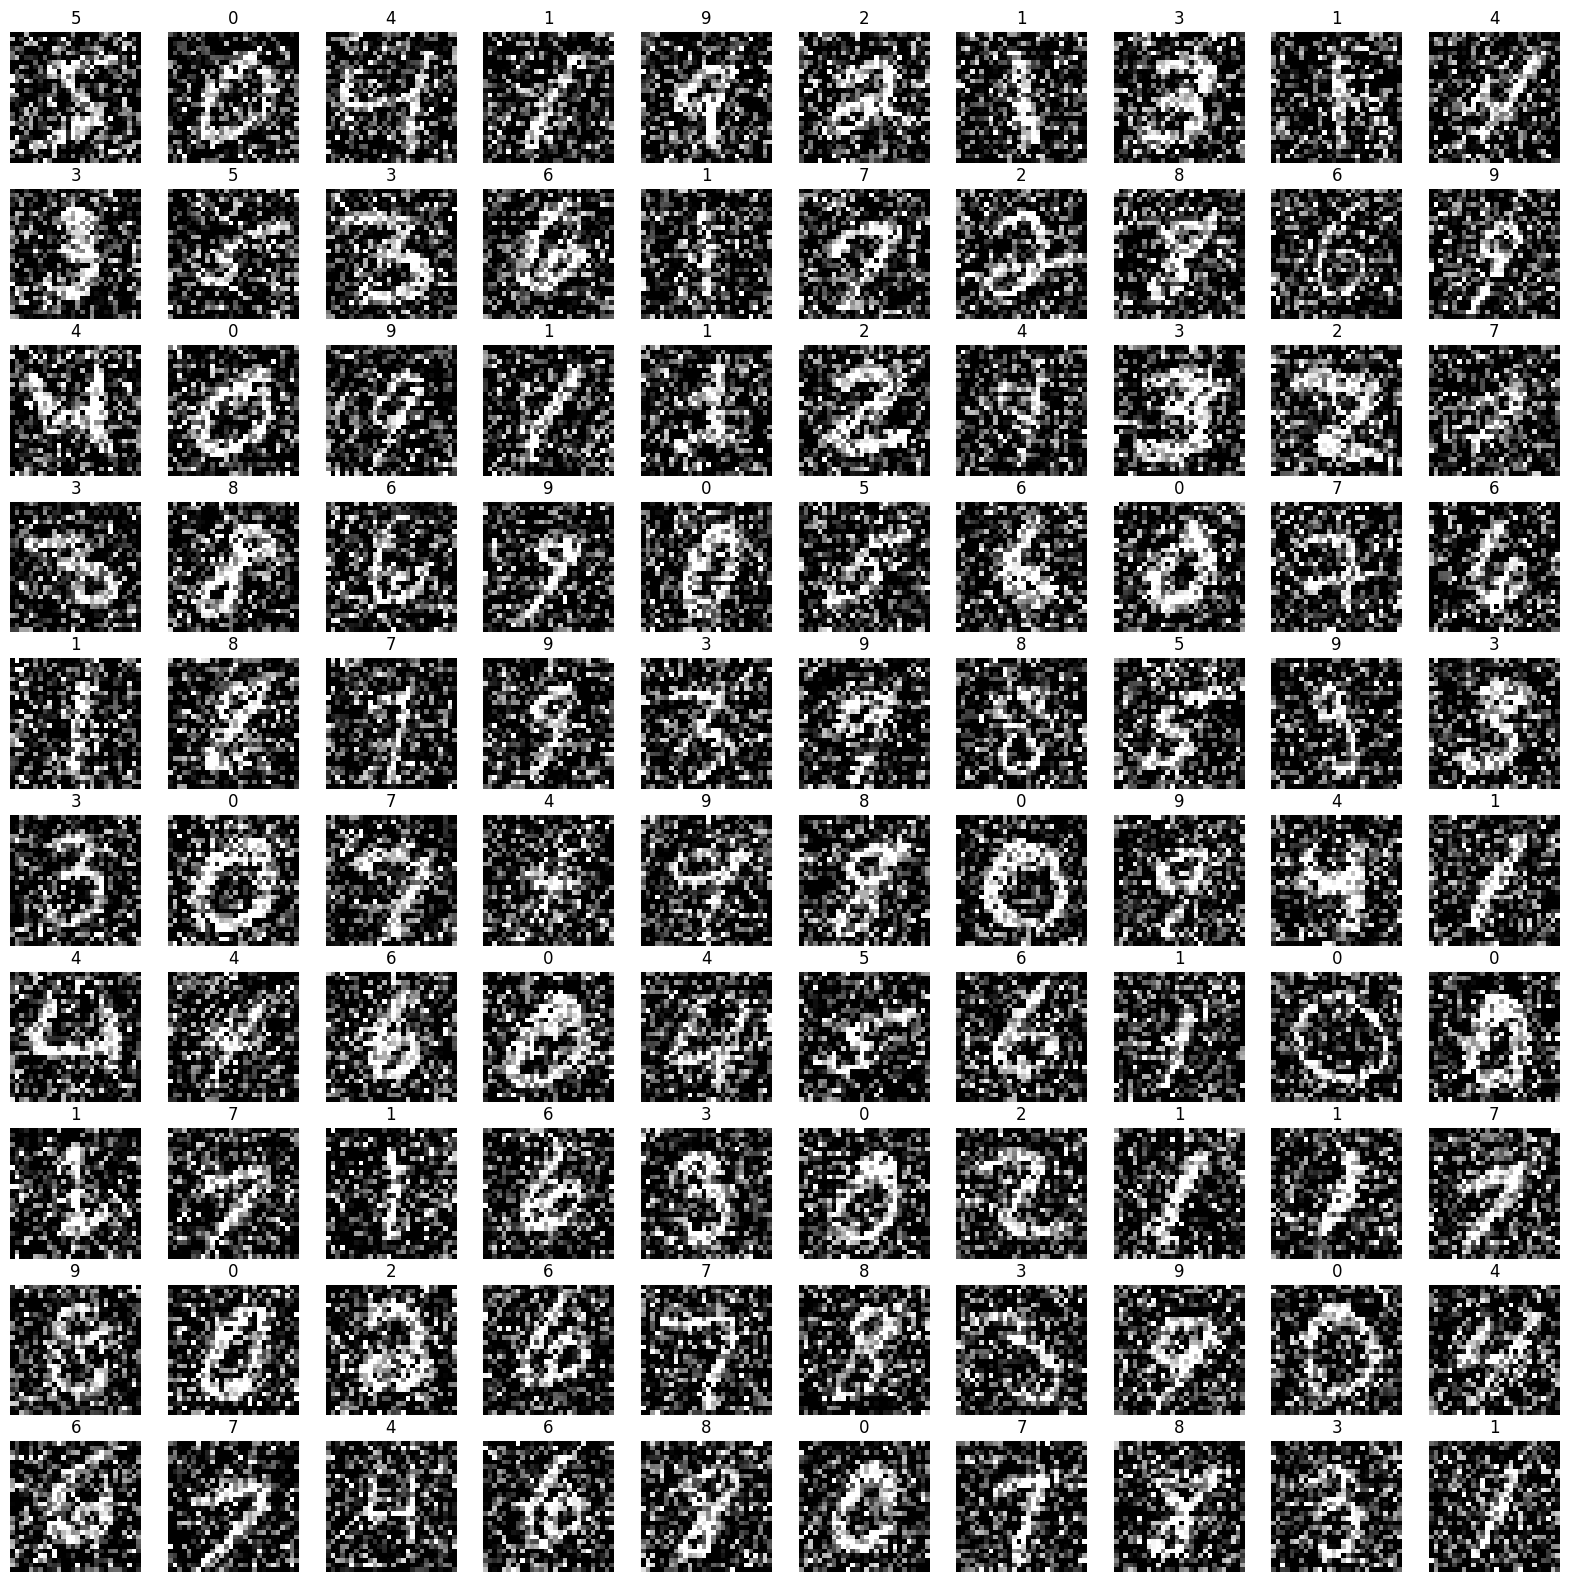

In [ ]:
# Data visualization
ncols = 10
nrows = 10

# Create figure
fig, axs = plt.subplots(figsize=(20, 20))
plt.axis('off')

print('Training images\n')

for i in range(ncols * nrows):

  axs = fig.add_subplot(nrows, ncols, i + 1)
  axs.imshow(x_train_noisy[i], cmap='gray')
  axs.axis('off')

  label = str(y_train[i])
  plt.title(label)

plt.show()

In [ ]:
# Autoencoder
model = tf.keras.Sequential([
        # Input
        tf.keras.layers.Input(shape = (28, 28, 1)),

        # Encoder
        tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3),
                               strides = 2, activation = 'relu',
                               padding = 'same'),
        tf.keras.layers.Conv2D(filters = 8, kernel_size = (3, 3),
                               strides = 2, activation = 'relu',
                               padding = 'same'),

        # Decoder
        tf.keras.layers.Conv2DTranspose(filters = 8, kernel_size = (3, 3),
                               strides = 2, activation = 'relu',
                               padding = 'same'),
        tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = (3, 3),
                               strides = 2, activation = 'relu',
                               padding = 'same'),
        tf.keras.layers.Conv2D(filters = 1, kernel_size = (3, 3),
                               strides = 1, activation = 'sigmoid',
                               padding = 'same')])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 8)      │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 16)     │         1,168 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,217 (12.57 KB)

 Trainable params: 3,217 (12.57 KB)

 Non-trainable params: 0 (0.00 B)



Representación gráfica del modelo


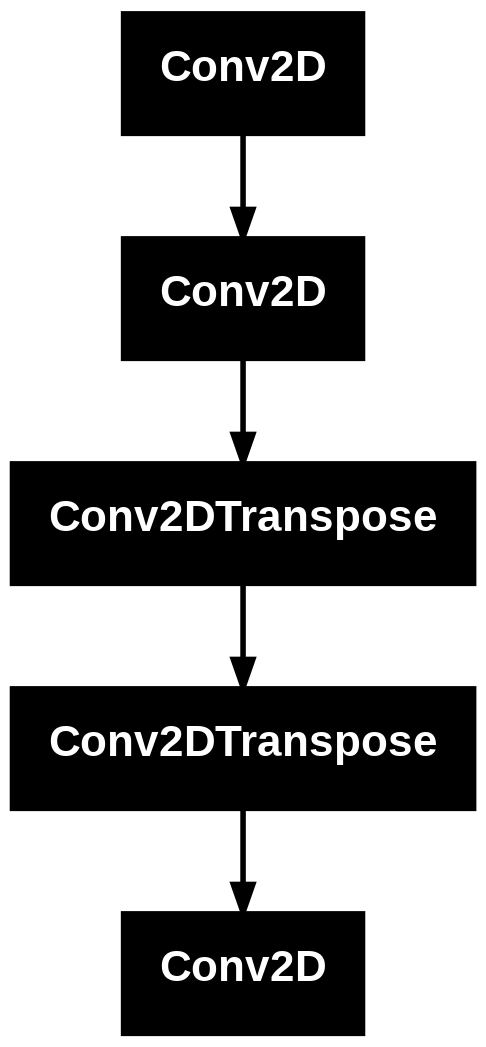

In [ ]:
# Descrición del modelo
model.summary()

# Representación gráfica del modelo
print()
print()
print('Representación gráfica del modelo')
tf.keras.utils.plot_model(model)

In [ ]:
# Compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [ ]:
# Train model
epochs = 60
history = model.fit(x_train_noisy, x_train,
                    batch_size = 254,
                    epochs = epochs,
                    validation_data = (x_test_noisy, x_test),
                    verbose = 1)

Epoch 1/60
237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - acc: 0.7820 - loss: 0.4957 - val_acc: 0.8067 - val_loss: 0.1335
Epoch 2/60
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8092 - loss: 0.1267 - val_acc: 0.8100 - val_loss: 0.1162
Epoch 3/60
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8110 - loss: 0.1164 - val_acc: 0.8112 - val_loss: 0.1133
Epoch 4/60
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8114 - loss: 0.1133 - val_acc: 0.8105 - val_loss: 0.1108
Epoch 5/60
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8116 - loss: 0.1116 - val_acc: 0.8106 - val_loss: 0.1097
Epoch 6/60
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - acc: 0.8120 - loss: 0.1104 - val_acc: 0.8109 - val_loss: 0.1087
Epoch 7/60
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8117 - loss: 0.1096 - val_acc: 0.8106 - val_loss: 0.1083
Epoch 8/60
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.8117 - loss: 0.1090 - val_acc: 0.8109 - val_loss: 0.1077
Epoch 9/60
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - 

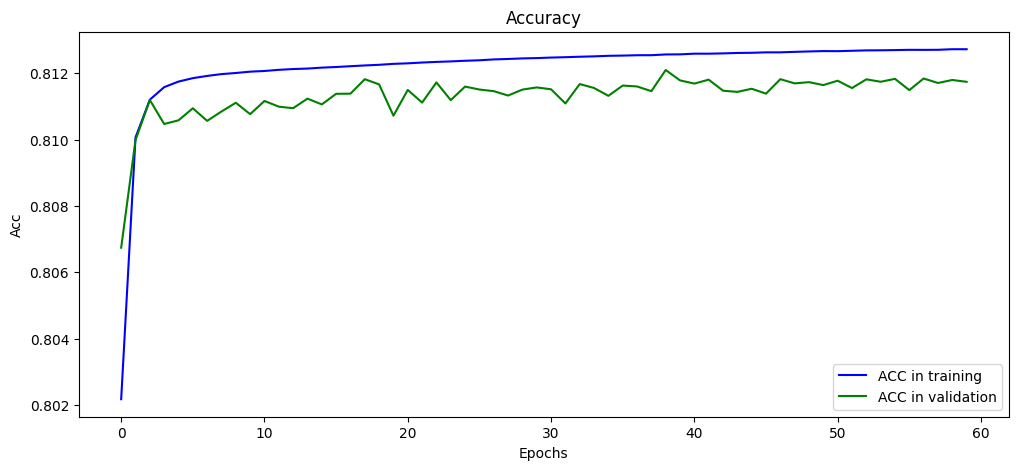

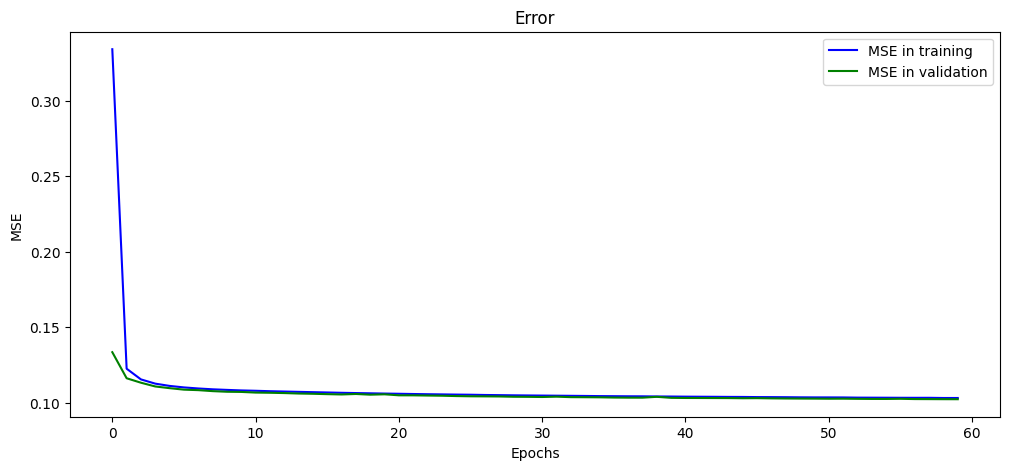

In [ ]:
# Training and validation graphs
training_acc = history.history['acc']
validation_acc = history.history['val_acc']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epocas = np.arange(len(training_loss))

plt.figure(figsize = (12, 5))
plt.plot(epocas, training_acc, color = 'blue', label = 'ACC in training')
plt.plot(epocas, validation_acc, color = 'green', label = 'ACC in validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()
print()

plt.figure(figsize = (12, 5))
plt.plot(epocas, training_loss, color = 'blue', label = 'MSE in training')
plt.plot(epocas, validation_loss, color = 'green', label = 'MSE in validation')
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
# Model prediction
resultados = model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Test images



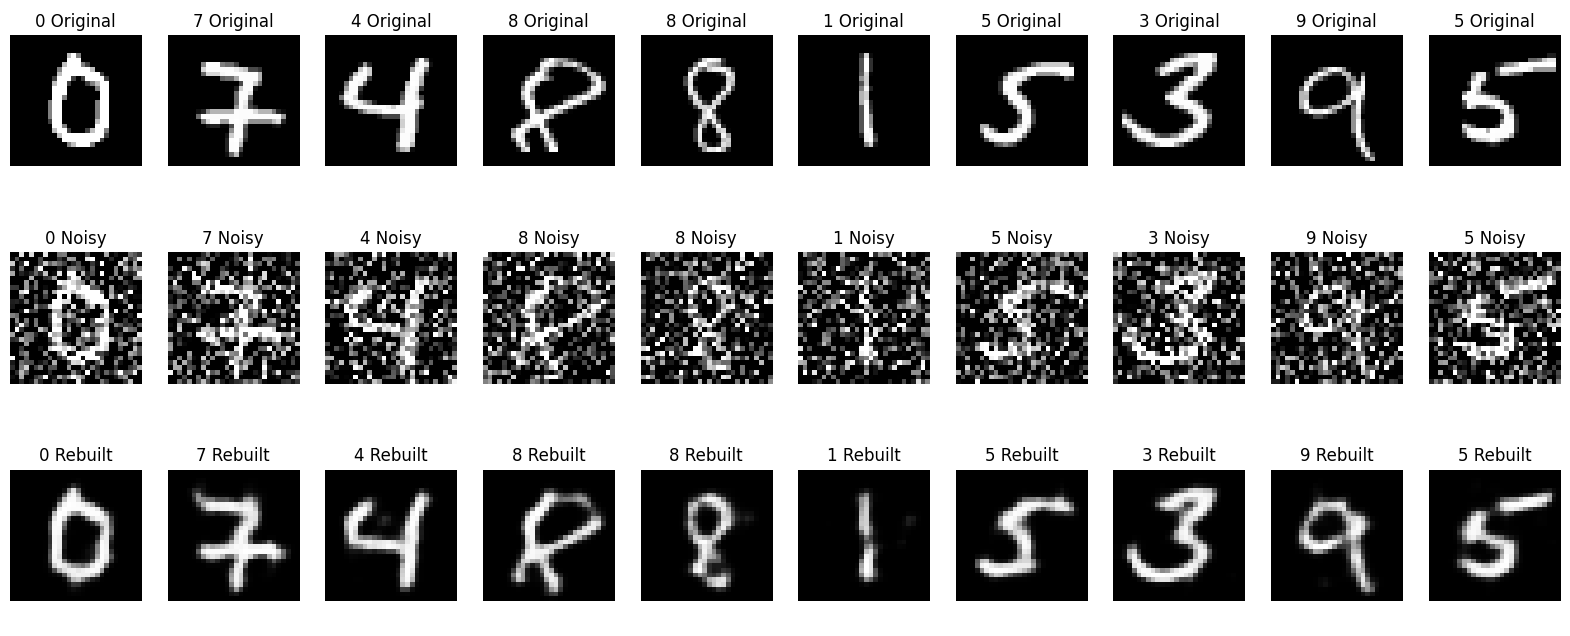

In [ ]:
# Data visualization
num = np.random.randint(resultados.shape[0])

ncols = 10
nrows = 3

plt.subplots(figsize = (20, 8))
plt.axis('off')

print('Test images\n')

for i in range(ncols):

  img = x_test[i + num].reshape(28, 28)
  plt.subplot(nrows, ncols, i + 1)
  plt.imshow(img, cmap = 'gray')
  plt.axis('off')
  plt.title(str(y_test[i + num]) + ' Original')

  img = tf.squeeze(x_test_noisy[i + num])
  plt.subplot(nrows, ncols, i + 1 + ncols)
  plt.imshow(img, cmap = 'gray')
  plt.axis('off')
  plt.title(str(y_test[i + num]) + ' Noisy')

  img = resultados[i + num].reshape(28, 28)
  plt.subplot(nrows, ncols, i + 1 + 2*ncols)
  plt.imshow(img, cmap = 'gray')
  plt.axis('off')
  plt.title(str(y_test[i + num]) + ' Rebuilt')

plt.show()